Zahara Haghshenas

Narjes Sheikhpour Shirazi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [ ]:
%ls

drive/  sample_data/


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler, normalize
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
import seaborn as sns
import random

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/kaggle/ratings.csv')
df2=pd.read_csv('/content/drive/MyDrive/kaggle/movies_metadata.csv')
df3=pd.read_csv('/content/drive/MyDrive/kaggle/ratings_small.csv')

<ipython-input-5-e42a4e8736e1>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('/content/drive/MyDrive/kaggle/movies_metadata.csv')


In [ ]:
df2

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

In [ ]:
df2.shape

(45466, 24)

In [ ]:
df2.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
df2.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
data=df2[['revenue','runtime','vote_average','vote_count','title']]

In [ ]:
data

revenue  runtime  vote_average  vote_count  \
0      373554033.0     81.0           7.7      5415.0   
1      262797249.0    104.0           6.9      2413.0   
2              0.0    101.0           6.5        92.0   
3       81452156.0    127.0           6.1        34.0   
4       76578911.0    106.0           5.7       173.0   
...            ...      ...           ...         ...   
45461          0.0     90.0           4.0         1.0   
45462          0.0    360.0           9.0         3.0   
45463          0.0     90.0           3.8         6.0   
45464          0.0     87.0           0.0         0.0   
45465          0.0     75.0           0.0         0.0   

                             title  
0                        Toy Story  
1                          Jumanji  
2                 Grumpier Old Men  
3                Waiting to Exhale  
4      Father of the Bride Part II  
...                            ...  
45461                       Subdue  
45462          Century of Birthing  
45463                     Betrayal  
45464             Satan Triumphant  
45465                     Queerama  

[45466 rows x 5 columns]

In [ ]:
data=data.fillna(0)

In [ ]:
#scale the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])
data_scaled

array([[ 5.63284127, -0.32302586,  1.08175173, 10.79868932],
       [ 3.91107505,  0.26738779,  0.66619967,  4.68804853],
       [-0.17423159,  0.19037732,  0.45842364, -0.03640093],
       ...,
       [-0.17423159, -0.09199443, -0.94406458, -0.21145593],
       [-0.17423159, -0.1690049 , -2.91793688, -0.22366907],
       [-0.17423159, -0.47704681, -2.91793688, -0.22366907]])

In [ ]:
inertia = []
silhouette_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=3,n_init=4)
    kmeans.fit(data_scaled)
    #center=kmeans.cluster_centers
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))
    print(silhouette_scores)

[0.827036448633998]
[0.827036448633998, 0.5411869204344316]
[0.827036448633998, 0.5411869204344316, 0.5605296346014659]
[0.827036448633998, 0.5411869204344316, 0.5605296346014659, 0.5118059195421342]
[0.827036448633998, 0.5411869204344316, 0.5605296346014659, 0.5118059195421342, 0.5307677373343779]
[0.827036448633998, 0.5411869204344316, 0.5605296346014659, 0.5118059195421342, 0.5307677373343779, 0.34024373822234266]
[0.827036448633998, 0.5411869204344316, 0.5605296346014659, 0.5118059195421342, 0.5307677373343779, 0.34024373822234266, 0.3580758336366725]
[0.827036448633998, 0.5411869204344316, 0.5605296346014659, 0.5118059195421342, 0.5307677373343779, 0.34024373822234266, 0.3580758336366725, 0.37028547576352583]


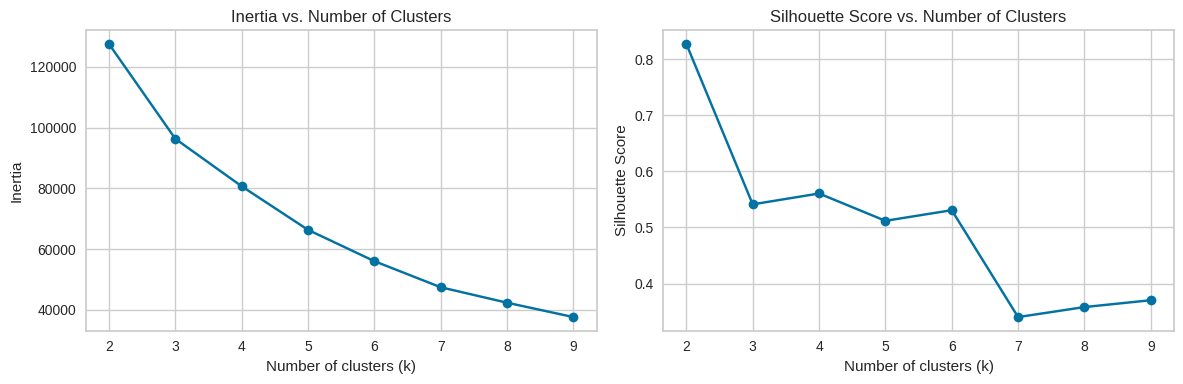

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.tight_layout()
plt.show()

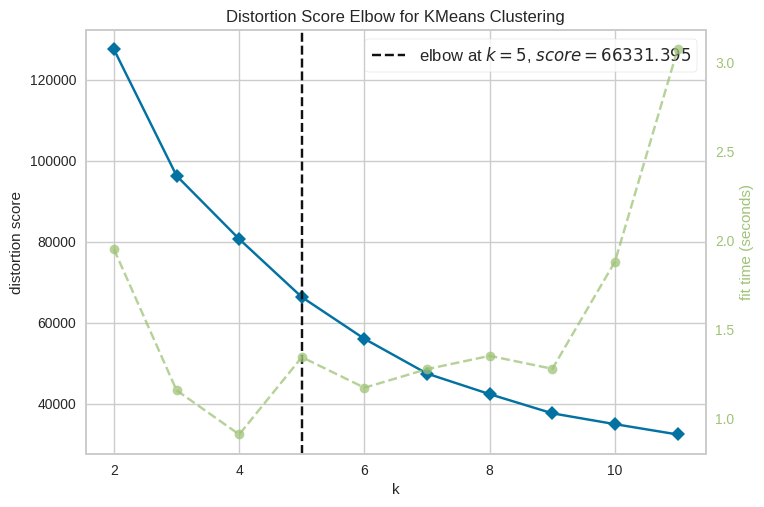

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(n_init=8)
visualiser = KElbowVisualizer(model, k=(2,12))
visualiser.fit(data_scaled)
visualiser.show()

In [ ]:

kmeans_mod = KMeans(n_clusters=5, n_init=10)
kmeans_mod.fit(data_scaled)

KMeans(n_clusters=5, n_init=10)

In [ ]:
labels =kmeans_mod.fit_predict(data_scaled)
data['cluster']=labels
data=data[['revenue','runtime','vote_average','vote_count','cluster','title']]
data

revenue  runtime  vote_average  vote_count  cluster  \
0      373554033.0     81.0           7.7      5415.0        4   
1      262797249.0    104.0           6.9      2413.0        1   
2              0.0    101.0           6.5        92.0        0   
3       81452156.0    127.0           6.1        34.0        0   
4       76578911.0    106.0           5.7       173.0        0   
...            ...      ...           ...         ...      ...   
45461          0.0     90.0           4.0         1.0        0   
45462          0.0    360.0           9.0         3.0        0   
45463          0.0     90.0           3.8         6.0        0   
45464          0.0     87.0           0.0         0.0        2   
45465          0.0     75.0           0.0         0.0        2   

                             title  
0                        Toy Story  
1                          Jumanji  
2                 Grumpier Old Men  
3                Waiting to Exhale  
4      Father of the Bride Part II  
...                            ...  
45461                       Subdue  
45462          Century of Birthing  
45463                     Betrayal  
45464             Satan Triumphant  
45465                     Queerama  

[45466 rows x 6 columns]

In [ ]:
data['cluster'].value_counts()

0    36353
2     4240
3     3550
1     1133
4      190
Name: cluster, dtype: int64

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data_scaled)

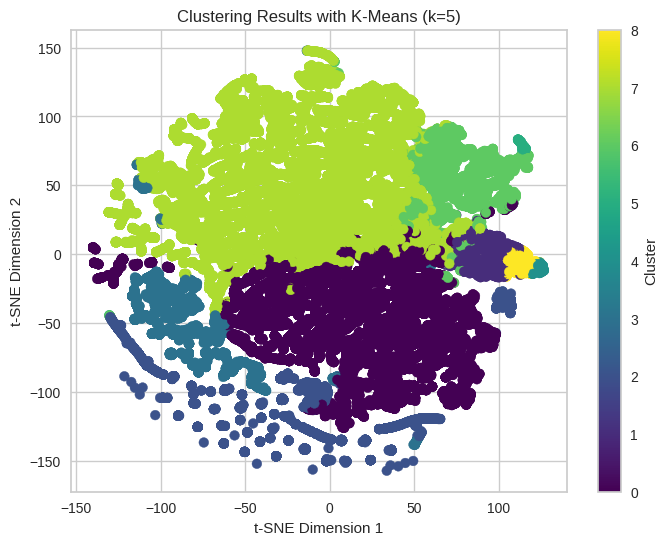

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with K-Means (k=5)'.format(5))
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
cdata=data[['cluster','title']]
cdata

cluster                        title
0            4                    Toy Story
1            1                      Jumanji
2            0             Grumpier Old Men
3            0            Waiting to Exhale
4            0  Father of the Bride Part II
...        ...                          ...
45461        0                       Subdue
45462        0          Century of Birthing
45463        0                     Betrayal
45464        2             Satan Triumphant
45465        2                     Queerama

[45466 rows x 2 columns]

In [ ]:
cluster0=[]
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]

filmname=''
for i in cdata.iloc():
     if i[0]==0:
      filmname=''
      filmname=i[1]
      #print(filmname)
      cluster0.append(filmname)
     elif i[0]==1:
        filmname=''
        filmname=i[1]
        cluster1.append(filmname)
     elif i[0]==2:
        filmname=''
        filmname=i[1]
        cluster2.append(filmname)
     if i[0]==3:
        filmname=''
        filmname=i[1]
        cluster3.append(filmname)
     if i[0]==4:
        filmname=''
        filmname=i[1]
        cluster4.append(filmname)
print(len(cluster0))
print(len(cluster1))
print(len(cluster2))
print(len(cluster3))
print(len(cluster4))


print((cluster0))
print((cluster1))
print((cluster2))
print((cluster3))
print((cluster4))


36353
1133
4240
3550
190
['Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Sabrina', 'Tom and Huck', 'Sudden Death', 'The American President', 'Dracula: Dead and Loving It', 'Balto', 'Nixon', 'Cutthroat Island', 'Sense and Sensibility', 'Four Rooms', 'Money Train', 'Get Shorty', 'Copycat', 'Assassins', 'Powder', 'Leaving Las Vegas', 'Othello', 'Now and Then', 'Persuasion', 'The City of Lost Children', 'Shanghai Triad', 'Dangerous Minds', 'Carrington', 'Dead Man Walking', 'It Takes Two', 'Clueless', 'Cry, the Beloved Country', 'Richard III', 'Dead Presidents', 'Restoration', 'Mortal Kombat', 'To Die For', 'How To Make An American Quilt', 'When Night Is Falling', 'Guardian Angel', 'Mighty Aphrodite', 'Lamerica', 'The Big Green', 'Georgia', 'Home for the Holidays', 'The Postman', 'The Confessional', 'The Indian in the Cupboard', 'Eye for an Eye', "Mr. Holland's Opus", "Don't Be a Menace to South Central While Drinking Your Juice in the Hood", 'Two If by Sea', 'Bio-

In [ ]:
data=data.iloc[:, :-1]
data

revenue  runtime  vote_average  vote_count  cluster
0      373554033.0     81.0           7.7      5415.0        4
1      262797249.0    104.0           6.9      2413.0        1
2              0.0    101.0           6.5        92.0        0
3       81452156.0    127.0           6.1        34.0        0
4       76578911.0    106.0           5.7       173.0        0
...            ...      ...           ...         ...      ...
45461          0.0     90.0           4.0         1.0        0
45462          0.0    360.0           9.0         3.0        0
45463          0.0     90.0           3.8         6.0        0
45464          0.0     87.0           0.0         0.0        2
45465          0.0     75.0           0.0         0.0        2

[45466 rows x 5 columns]

In [ ]:
from sklearn.decomposition import PCA
pca_mod = PCA(n_components=3)
# fit the PCA model to the (scaled) features
pca_mod.fit(data)

PCA(n_components=3)

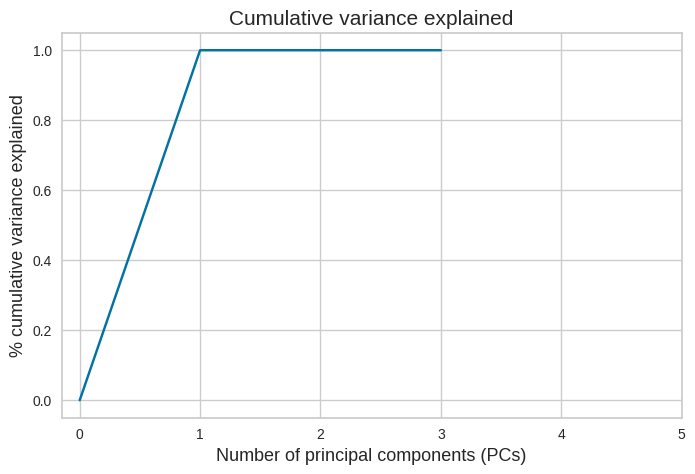

array([0., 1., 1., 1.])

In [ ]:
# plot the cumulative variance explained across all the components
# start the explained variance at 0
exp_variance = np.insert(pca_mod.explained_variance_ratio_, 0, 0)

# plot the explained variance
figure = plt.figure(figsize=(8, 5))

plt.plot(np.cumsum(exp_variance))
plt.xticks(range(0,6))
plt.xlabel("Number of principal components (PCs)", size=13)
plt.ylabel("% cumulative variance explained", size=13)
plt.title("Cumulative variance explained", size=15)

plt.show()
np.cumsum(exp_variance)

In [ ]:
pca_mod = PCA(n_components=3)

data_pca = pd.DataFrame(data=pca_mod.fit_transform(data_scaled),
                        columns=['PC1', 'PC2', 'PC3'])

# view data frame of PCs
data_pca.head()

PC1       PC2       PC3
0  11.288717 -2.738027 -1.158343
1   6.012798 -1.107200 -0.334983
2  -0.010723  0.486045 -0.187693
3   0.859553  0.532441  0.449372
4   0.847150 -0.006859  0.204972

In [ ]:
# combine data for plotting
data.reset_index(drop=True, inplace=True)
data_pca.reset_index(drop=True, inplace=True)
plot_data = pd.concat([data_pca, data['cluster']], axis=1)



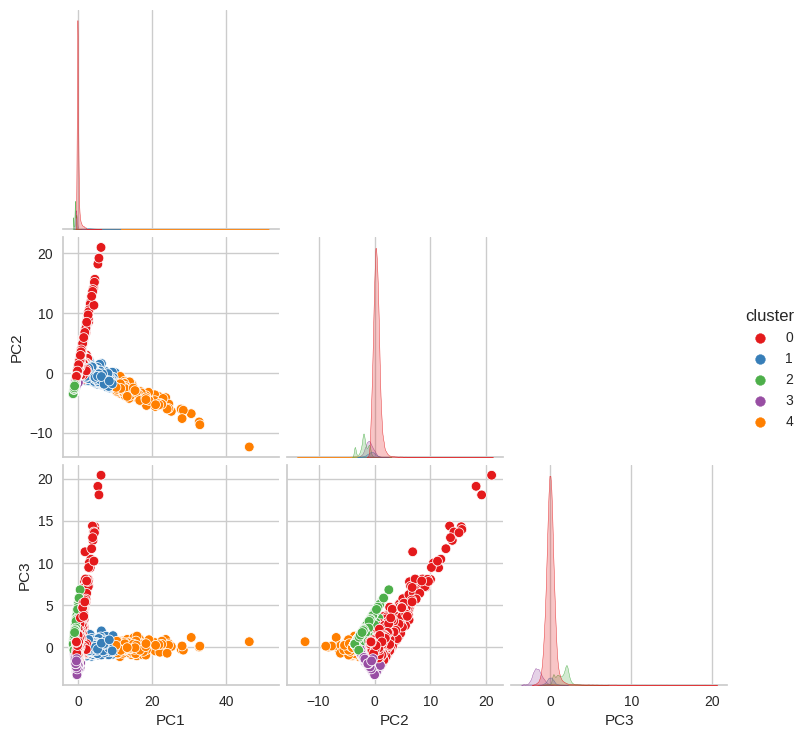

In [ ]:
# visualise the clusters by plotting the PCAs in a scatter/pair plot,
# with points colored by cluster membership
sns.pairplot(data=plot_data,
             hue='cluster',
             palette='Set1',
             corner=True)

In [ ]:
cluster=[cluster0,cluster1,cluster2,cluster3,cluster4]

In [ ]:
def recomender(input1,input2,input3):

  encod_input1=[]
  encod_input2=[]
  encod_input3=[]


  encod_input1.append(cluster0.count(input1))
  encod_input1.append(cluster1.count(input1))
  encod_input1.append(cluster2.count(input1))
  encod_input1.append(cluster3.count(input1))
  encod_input1.append(cluster4.count(input1))



  encod_input2.append(cluster0.count(input2))
  encod_input2.append(cluster1.count(input2))
  encod_input2.append(cluster2.count(input2))
  encod_input2.append(cluster3.count(input2))
  encod_input2.append(cluster4.count(input2))



  encod_input3.append(cluster0.count(input3))
  encod_input3.append(cluster1.count(input3))
  encod_input3.append(cluster2.count(input3))
  encod_input3.append(cluster3.count(input3))
  encod_input3.append(cluster4.count(input3))


  return encod_input1,encod_input2,encod_input3


def recomender2(a):
  s1=0
  s2=0
  s3=0
  for i in range(0,5):
    if a[0][i]!=0:
        s1=i
        #print(f'The first film is in cluster {i+1}')
    if a[1][i]!=0:
       s2=i
       #print(f'The second film is in cluster {i+1}')
    if a[2][i]!=0:
       s3=i
       #print(f'The third film is in cluster {i+1}')
  return s1, s2, s3



def recom(b):
  if b[0]==b[1]==b[2]:
    return random.choice(cluster[b[1]])
  if b[0]==b[1]!=b[2]:
    return random.choice(cluster[b[1]])
  if b[0]!=b[1]==b[2]:
     return random.choice(cluster[b[1]])
  if b[0]==b[2]!=b[1]:
     return random.choice(cluster[b[2]])
  if  b[0]!=b[2]!=b[1]:
     return random.choice(cluster[b[0]])

def original_recom(input1,input2,input3):
  return recom(recomender2(recomender(input1,input2,input3)))

In [ ]:
a=recomender('The Ballroom','Scooby-Doo! and the Reluctant Werewolf','Last Summer')
a

In [ ]:
b=recomender2(a)
print(b)

In [ ]:
recom(b)

In [ ]:
cluster4.count("Trial")

In [ ]:
!pip install gradio

In [ ]:
import numpy as np
import gradio as gr


def original_recom(input1,input2,input3):
  return recom(recomender2(recomender(input1,input2,input3)))
with gr.Blocks() as demo:
    gr.Markdown("Flip text or image files using this demo.")

    input1 = gr.Textbox(placeholder='first film name...')

    input2 = gr.Textbox(placeholder='second film name...')

    input3 = gr.Textbox(placeholder='third film name...')

    text_output=gr.Textbox( )


    text_button = gr.Button("Submit")
    text_button.click(original_recom, inputs=[input1,input2,input3], outputs=text_output)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
cluster4.count('The Sex of Angels')